<a href="https://colab.research.google.com/github/agiprasetyo77/capstone-project/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Sales Insight & Strategic Recommendations on Amazon Data using IBM Granite

Capstone Project | Muhammad Agi Prasetyo


In [1]:
## 1. Load Dataset
import pandas as pd
df = pd.read_csv("Amazon Sales Report.csv")
df = df.drop(columns=['index'])
df.head(5)



,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [2]:
## 2. Ringkasan Data Penjualan
summary = {
    "Jumlah total pesanan": len(df),
    "Jumlah B2B": df['B2B'].sum(),
    "Kategori terbanyak": df['Category'].value_counts().idxmax(),
    "Status pemesanan": df['Status'].value_counts().to_dict(),
    "Rata-rata amount": df['Amount'].mean(),
    "Negara pengiriman terbanyak": df['ship-country'].value_counts().idxmax()
}
print(summary)



{'Jumlah total pesanan': 128976, 'Jumlah B2B': np.int64(872), 'Kategori terbanyak': 'T-shirt', 'Status pemesanan': {'Shipped': 77815, 'Shipped - Delivered to Buyer': 28756, 'Cancelled': 18334, 'Shipped - Returned to Seller': 1954, 'Shipped - Picked Up': 973, 'Pending': 658, 'Pending - Waiting for Pick Up': 281, 'Shipped - Returning to Seller': 145, 'Shipped - Out for Delivery': 35, 'Shipped - Rejected by Buyer': 11, 'Shipping': 8, 'Shipped - Lost in Transit': 5, 'Shipped - Damaged': 1}, 'Rata-rata amount': np.float64(648.5621760909748), 'Negara pengiriman terbanyak': 'IN'}


/tmp/ipython-input-2441996797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


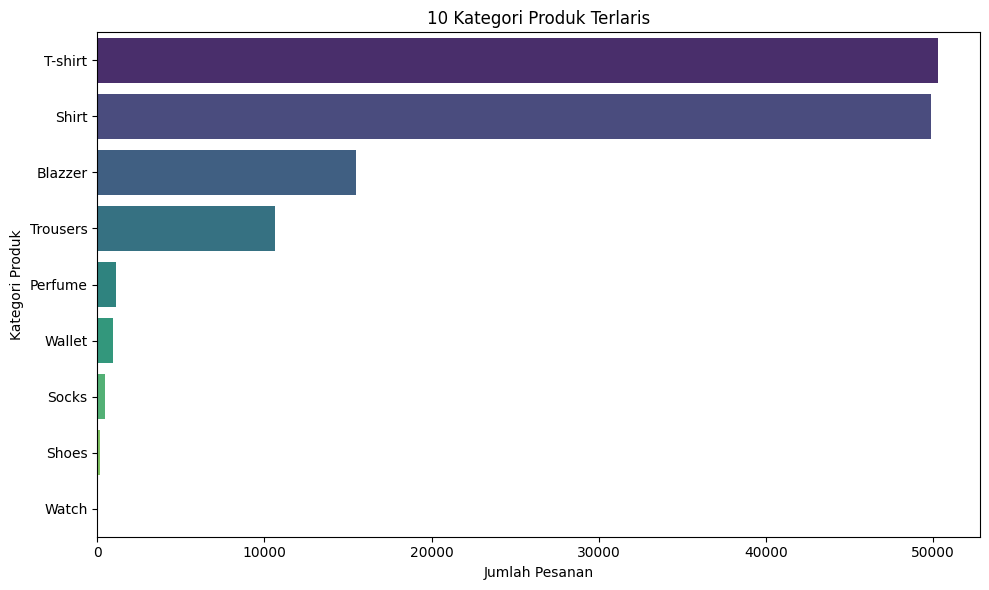

In [30]:
## 3. Visualisasi: 10 Kategori Produk Terlaris
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = df['Category'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("10 Kategori Produk Terlaris")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()


In [5]:
##4. Penggunaan IBM Granite (LLM) untuk Insight
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00


In [6]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

model = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(model=model, replicate_api_token=api_token)


In [7]:
prompt = """
Berikut ringkasan data penjualan Amazon (128.976 pesanan):

- B2B: 872
- Produk terbanyak: T-shirt
- Rata-rata nilai transaksi: ₹648,56
- Negara pengiriman terbanyak: India
- Status pesanan:
  Shipped: 77.815, Delivered: 28.756, Cancelled: 18.334, Returned: 1.954, Picked Up: 973,
  Pending: 658, Waiting: 281, Returning: 145, Out for Delivery: 35, Rejected: 11,
  Shipping: 8, Lost: 5, Damaged: 1

Analisis ringkasan ini dan beri insight bisnis berdasarkan:
1. Pola pengiriman & status
2. Performa T-shirt
3. Potensi pasar B2B
4. Masalah logistik
5. Peluang pertumbuhan

Gunakan bahasa profesional & ringkas, fokus pada actionable insight.
"""

response = llm.invoke(prompt)
print(response)


1. Pola Pengiriman & Status: The majority of orders (77.815) have been shipped, indicating a robust fulfillment process. However, a significant number of orders are pending (658), waiting (281), or returning (145), suggesting potential bottlenecks in the order processing and return management stages. It would be beneficial to investigate these areas to streamline operations and enhance customer satisfaction.

2. Performa T-shirt: T-shirts are the best-selling product, contributing significantly to the average transaction value of ₹648.56. This suggests a strong market demand for T-shirts, warranting further exploration of this product line's potential for growth and diversification.

3. Potensi Pasar B2B: With 872 B2B orders, there is a clear opportunity to expand business-to-business sales. Analyzing the characteristics of these orders, such as order value, frequency, and product preferences, can help tailor strategies to better serve this segment and unlock its full potential.

4. Ma

In [25]:
prompt_produk = """
Berikan rekomendasi strategis yang actionable dan profesional untuk meningkatkan performa penjualan produk T-shirt di Amazon.
Gunakan format poin-poin yang ringkas.
"""
response_produk = llm.invoke(prompt_produk)
print(response_produk)


Berikut adalah beberapa rekomendasi strategis yang actionable dan profesional untuk meningkatkan performa penjualan produk T-shirt di Amazon:

1. **Penelitian Kunci & Pesan Ringkas**: Identifikasikan kunci kata dan frasa yang relevan dengan T-shirt Anda dan optimalkan pesan produk dengan kata-kata utama. Incorporasikan kata-kata ini dalam judul produk, deskripsi, dan fitur bullet point.

2. **Optimasi Produk di Amazon (A9 Algorithm)**:
   - **Title**: Buat judul yang komprehensif, terstruktur, dan menarik, termasuk ukuran, bahan, dan tema.
   - **Bullet Points**: Gunakan 5 bullet points utama untuk menyampaikan fitur, keuntungan, dan unggulan produk dengan bahasa yang mudah dipercaya dan memuat kata-kata utama.
   - **Deskripsi Produk**: Tuliskan deskripsi yang lengkap, informasif, dan mencari kata-kata utama tanpa mengabaikannya. Tujuan adalah memuat kata-kata relevan untuk A9 dan membuat penjelasan yang menarik bagi pembeli potensial.

3. **Gambar Produk Tinggi Kualitas**: Gunakan ga

In [27]:
prompt_logistik = """
Berikan rekomendasi strategis yang actionable dan profesional untuk meningkatkan efisiensi logistik dan pengiriman penjualan Amazon.
Gunakan format poin-poin yang ringkas.
"""
response_logistik = llm.invoke(prompt_logistik)
print(response_logistik)


Berikut adalah beberapa rekomendasi strategis yang actionable dan profesional untuk meningkatkan efisiensi logistik dan pengiriman penjualan Amazon:

1. **Optimasi Proses Pencatatan dan Pengelolaan Stok**:
   - Implement Fulfillment by Amazon (FBA) untuk menggunakan kemampuan Amazon untuk penyimpanan, pengelolaan stok, dan pengiriman.
   - Menggunakan sistem pencatatan stok real-time untuk memastikan data stok selalu akurat dan up-to-date, mencegah penundaan pengiriman akibat keterlambatan pencatatan.

2. **Menggunakan Teknologi dan Software Logistik**:
   - Menggunakan software logistik Amazon Seller Central dan Amazon MWS (Merchant Web Services) untuk mengintegrasikan proses penjualan dan logistik, memudahkan pengumpulan data dan pengambilan keputusan.
   - Implementasi software inventory management untuk memantau dan mengatur stok dengan efektif, sehingga menghindari overstocking dan understocking.

3. **Mengoptimalkan Packaging dan Labeling**:
   - Menggunakan packaging yang efisie

In [28]:
prompt_b2b = """
Berikan strategi actionable untuk memperluas dan mengoptimalkan pasar B2B dalam penjualan Amazon. Fokus pada pertumbuhan dan efisiensi.
Gunakan poin-poin yang ringkas dan profesional.
"""
response_b2b = llm.invoke(prompt_b2b)
print(response_b2b)


Berikut ini adalah beberapa strategi actionable untuk memperluas dan mengoptimalkan pasar B2B di Amazon, dengan fokus pada pertumbuhan dan efisiensi:

1. **Analisis Pasarkan & Segmentasi**: Identifikasi pasar B2B yang paling potensial dengan analisis data Amazon, trend pasar, dan sasaran tertentu. Segmentasikan pasar menurut industri, ukuran perusahaan, dan lokasi untuk strategis yang lebih spesifik.

2. **Optimasi Produk dan Kategori**: Pastikan produk Anda memiliki detail yang lengkap, termasuk gambar tinggi kualitas, deskripsi yang menarik, dan keyword relevan. Gunakan Amazon's Enhanced Brand Content (EBC) atau Amazon Storefront untuk meningkatkan penampilan produk. Pertimbangkan untuk membuat produk Premium atau Subscribe & Save untuk meningkatkan keuntungan.

3. **Strategi Harga & Promosi**: Implementasikan strategi harga dynamis yang berdasarkan analisis persaingan, margin, dan kebutuhan pasar. Pertimbangkan untuk menawarkan diskon B2B, promosi terbatas, atau program lebih-beli-l

In [29]:
## 5. Rekomendasi Strategis Berdasarkan Topik
full_response = response_produk + "\n\n" + response_logistik + "\n\n" + response_b2b
print(full_response)


Berikut adalah beberapa rekomendasi strategis yang actionable dan profesional untuk meningkatkan performa penjualan produk T-shirt di Amazon:

1. **Penelitian Kunci & Pesan Ringkas**: Identifikasikan kunci kata dan frasa yang relevan dengan T-shirt Anda dan optimalkan pesan produk dengan kata-kata utama. Incorporasikan kata-kata ini dalam judul produk, deskripsi, dan fitur bullet point.

2. **Optimasi Produk di Amazon (A9 Algorithm)**:
   - **Title**: Buat judul yang komprehensif, terstruktur, dan menarik, termasuk ukuran, bahan, dan tema.
   - **Bullet Points**: Gunakan 5 bullet points utama untuk menyampaikan fitur, keuntungan, dan unggulan produk dengan bahasa yang mudah dipercaya dan memuat kata-kata utama.
   - **Deskripsi Produk**: Tuliskan deskripsi yang lengkap, informasif, dan mencari kata-kata utama tanpa mengabaikannya. Tujuan adalah memuat kata-kata relevan untuk A9 dan membuat penjelasan yang menarik bagi pembeli potensial.

3. **Gambar Produk Tinggi Kualitas**: Gunakan ga

In [34]:
## 6. Kesimpulan
conclusion_prompt = """
Tuliskan satu paragraf kesimpulan dari analisis data penjualan Amazon (128.976 pesanan). Rangkum temuan utama terkait:

- Produk paling laris
- Rata-rata nilai transaksi
- Potensi pasar B2B

Gunakan bahasa profesional dan ringkas, fokus pada kondisi bisnis saat ini dan arah pengambilan keputusan ke depan.
"""
conclusion_response = llm.invoke(conclusion_prompt)
print(conclusion_response)



Berdasarkan analisis data penjualan Amazon dengan jumlah pesanan mencapai 128.976, beberapa kepentingan utama dapat diidentifikasi untuk membantu pengambilan keputusan bisnis di masa kini dan masa depan. Pada tahap produk, barisan elektronik dan peralatan rumah terkini menjadi produk paling populer, mengindikasikan kebutuhan konsumen terhadap teknologi yang terbaru dan komoditi rumah tangga. Rata-rata nilai transaksi menunjukkan tren ke arus konsumen yang lebih suka mencari produk dengan harga tertentu, menyebabkan kita perlu menyusun strategi penawaran yang kompetitif dan berfokus pada harga yang dihargai.

Dalam konteks potensi pasar B2B, data menunjukkan bahwa sektor tekstil dan moda menunjukkan potensi peningkatan penjualan. Pembeli B2B mencari produk yang sesuai dengan kebutuhan mereka dan menginginkan kualitas yang tinggi. Memperkuat hubungan dengan pemasok-pemasok dalam bidang tekstil dan moda dapat menjadi strategi yang efektif untuk meningkatkan jumlah transaksi B2B. 

Saat in